Saving Superstore Dataset for DS.xlsx to Superstore Dataset for DS.xlsx
✅ R² Score: 0.0157
📉 Mean Squared Error: 4018929.35


/tmp/ipython-input-1-1067810252.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-1067810252.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('daily_sales_trend.png') # Save the plot
/tmp/ipython-input-1-1067810252.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('daily_sales_trend.png') # Save the plot
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


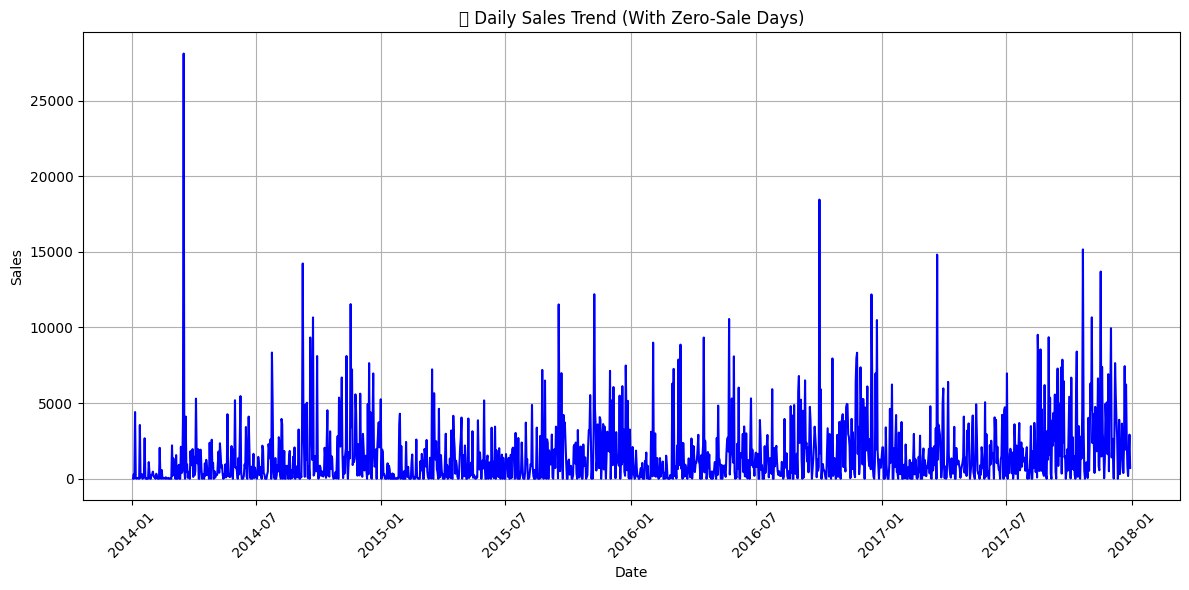

/tmp/ipython-input-1-1067810252.py:72: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-1067810252.py:73: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig('actual_vs_predicted_sales.png') # Save the plot
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


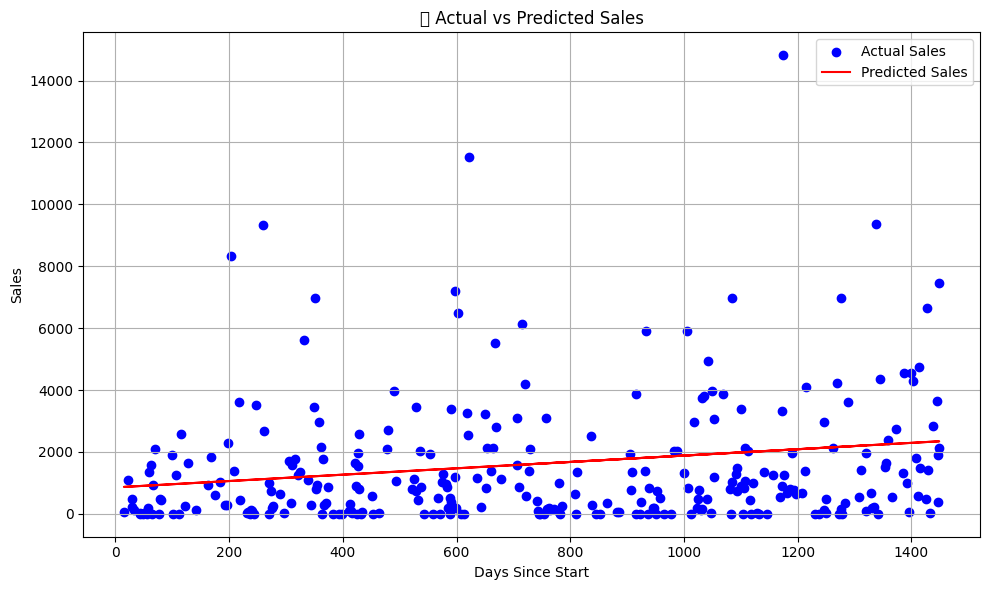

/tmp/ipython-input-1-1067810252.py:92: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-1067810252.py:93: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.savefig('forecasted_sales.png') # Save the plot
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


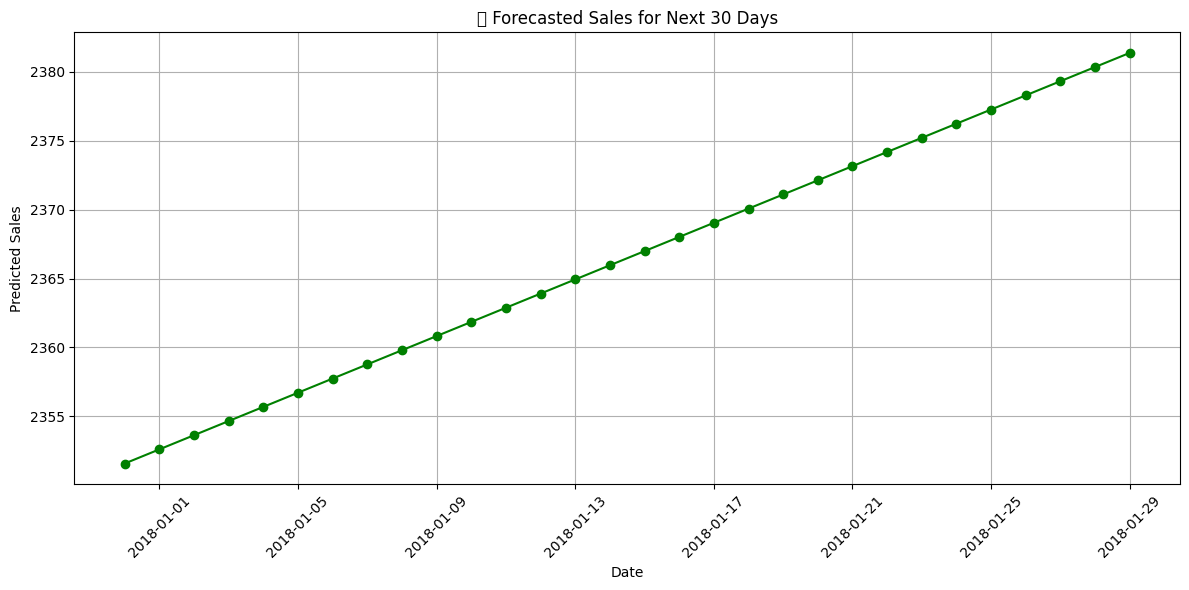

In [ ]:
# 📦 Superstore Sales Forecasting – Using Linear Regression

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

# Step 2: Upload the file
uploaded = files.upload()

# Step 3: Read Excel dataset
df = pd.read_excel("Superstore Dataset for DS.xlsx")

# Step 4: Preprocess date column & drop missing values
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dropna(inplace=True)

# Step 5: Group sales by day
daily_sales = df.groupby(pd.Grouper(key='Order Date', freq='D')).agg({'Sales': 'sum'}).reset_index()

# Step 6: Fill in missing dates (those with zero sales)
full_range = pd.date_range(start=daily_sales['Order Date'].min(), end=daily_sales['Order Date'].max())
daily_sales = daily_sales.set_index('Order Date').reindex(full_range, fill_value=0)
daily_sales = daily_sales.rename_axis("Order Date").reset_index()

# Step 7: Convert dates to numerical days for modeling
daily_sales['Days'] = (daily_sales['Order Date'] - daily_sales['Order Date'].min()).dt.days

# Step 8: Define features and target
X = daily_sales[['Days']]
y = daily_sales['Sales']

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Predict & evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 Mean Squared Error: {mse:.2f}")

# Step 12: Plot Daily Sales Trend (now includes all dates)
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='blue')
plt.title("📈 Daily Sales Trend (With Zero-Sale Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_sales_trend.png') # Save the plot
plt.show()

# Step 13: Actual vs Predicted Sales
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.title("🔍 Actual vs Predicted Sales")
plt.xlabel("Days Since Start")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_sales.png') # Save the plot
plt.show()

# Step 14: Forecasting next 30 days
future_days = pd.DataFrame({'Days': np.arange(X['Days'].max() + 1, X['Days'].max() + 31)})
future_sales = model.predict(future_days)

# Convert numeric days back to date
start_date = daily_sales['Order Date'].min()
future_days['Date'] = pd.to_datetime(start_date) + pd.to_timedelta(future_days['Days'], unit='D')

# Step 15: Plot Forecast
plt.figure(figsize=(12,6))
plt.plot(future_days['Date'], future_sales, marker='o', linestyle='-', color='green')
plt.title("🔮 Forecasted Sales for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('forecasted_sales.png') # Save the plot
plt.show()